In [1]:
# Import warnings library
import warnings 
# Set action = "ignore" to ignore warnings
warnings.filterwarnings(action= 'ignore')
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import functions as fu
import numpy as np
import statsmodels.formula.api as smf

from matplotlib.collections import PathCollection
from matplotlib.legend_handler import HandlerPathCollection, HandlerLine2D


# Import Data

In [2]:
df = pd.read_csv('Cleandata.csv') # save csv
df_list_of_neighbors = pd.read_csv('list_of_neighbors.csv') 
print(df.shape)

(1109286, 37)


In [3]:
df = df.loc[(df['log_price'] >= 0)]
df.shape

(1093288, 37)

In [4]:
df = df[df.Tax_diff != 0]
df.shape

(1090204, 37)

In [5]:
list_of_neighbors = []
for i in range(df_list_of_neighbors.shape[0]):
    row = df_list_of_neighbors.iloc[i]
    list_of_neighbors.append((row['0'], row['1']))

# Create picture of the kernel function


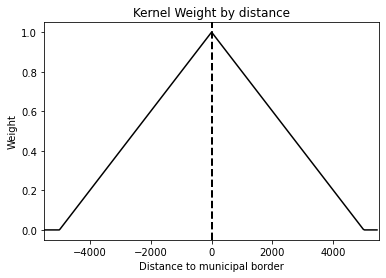

In [6]:
dfk = df[df.Neighbors_set == str(list_of_neighbors[1])]
dfk = dfk[dfk.Year == 2021]
dfk = dfk.sort_values(by=['Distance_sign'])

plt.plot(dfk['Distance_sign'], fu.kernel(dfk['Distance_sign'], c=0, h=5000), c='black')
plt.axvline(x=0, color= 'black', linestyle='--', linewidth=2)
plt.xlabel('Distance to municipal border')
plt.ylabel("Weight")
plt.xlim([-5500,5500])
plt.title("Kernel Weight by distance")
plt.savefig('kernel.png')
plt.show()

# Formula

In [7]:

for i in df.columns:
    if i.__contains__(' '):
        j = i.replace(" ", "_")
        j = j.replace(',','')
        j = j.replace('-','_')
        j = j.replace('.','')
        j = j.replace('(','')
        j = j.replace(')','')
        df = df.rename(columns={i:j})


In [8]:
col_list =df.columns.to_list()[7:]
col_list.remove('log_price')
col_list.remove('Neighbors_set')
col_list.remove('Grundskylds_promille_nabo')
col_list.remove('Tax_diff')
col_list.remove('Border_dummy')
cols = '+'.join(col_list)


In [9]:
long ="log_price~Distance_sign*Border_dummy"+ '+'+cols
short = "log_price~Distance_sign*Border_dummy"

# Local RDs

In [10]:
Parametric_s = fu.RDD(df, list_of_neighbors, short)

In [11]:
Parametric_l = fu.RDD(df, list_of_neighbors, long)

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 20
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 18
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 19
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 19
  warnings.warn('covariance of constraints does not have

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 16
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 17
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 17
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 17
  warnings.warn('covariance of constraints does not have

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 14
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 15
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 15
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 15
  warnings.warn('covariance of constraints does not have

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 18
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 15
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 16
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 14
  warnings.warn('covariance of constraints does not have

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 17
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 17
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 16
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 17
  warnings.warn('covariance of constraints does not have

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 16
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 15
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 15
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 16
  warnings.warn('covariance of constraints does not have

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 18
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 18
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 17
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 13
  warnings.warn('covariance of constraints does not have

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 15
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 16
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 17
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 14
  warnings.warn('covariance of constraints does not have

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 18
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 17
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 17
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 17
  warnings.warn('covariance of constraints does not have

In [12]:
Tri_s = fu.RDD(df,list_of_neighbors, short, kernel_w =True)

In [13]:
Tri_l = fu.RDD(df,list_of_neighbors, long, kernel_w =True)

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 20
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 18
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 19
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 19
  warnings.warn('covariance of constraints does not have

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 17
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 16
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 17
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 17
  warnings.warn('covariance of constraints does not have

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 15
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 14
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 15
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 15
  warnings.warn('covariance of constraints does not have

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 18
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 15
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 16
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 14
  warnings.warn('covariance of constraints does not have

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 17
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 17
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 16
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 17
  warnings.warn('covariance of constraints does not have

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 15
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 16
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 15
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 15
  warnings.warn('covariance of constraints does not have

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 18
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 18
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 17
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 13
  warnings.warn('covariance of constraints does not have

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 15
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 16
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 17
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 14
  warnings.warn('covariance of constraints does not have

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 17
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 17
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 17
  warnings.warn('covariance of constraints does not have full '
C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 16
  warnings.warn('covariance of constraints does not have

# Estimations

In [14]:
res_sharp_s, tap_sharp_s= fu.reg(Parametric_s)
tap_sharp_s = fu.table_col(tap_sharp_s)

In [15]:
res_sharp_l, tap_sharp_l= fu.reg(Parametric_l)
tap_sharp_l= fu.table_col(tap_sharp_l)

In [16]:
res_Tri_s, tab_Tri_s = fu.reg(Tri_s)
tab_Tri_s  = fu.table_col(tab_Tri_s)

In [17]:
res_Tri_l, tab_Tri_l = fu.reg(Tri_l)
tab_Tri_l = fu.table_col(tab_Tri_l)

In [18]:
results = pd.concat([tap_sharp_s, tap_sharp_l,tab_Tri_s, tab_Tri_l],axis=1)
results

,0,0,0,0
Intercept,-0.2035^{***},-0.1132,-0.2035^{***},-0.1132
,(0.062),(0.089),(0.062),(0.089)
Tax_diffs,0.0395^{***},0.0104,0.0395^{***},0.0104
,(0.008),(0.011),(0.008),(0.011)


In [19]:
controls =['⁒','$\checkmark$']*2
n = [Parametric_s.shape[0], Parametric_l.shape[0], Tri_s.shape[0] , Tri_l.shape[0] ]
obs = [Parametric_s.n.sum(), Parametric_l.n.sum(), Tri_s.n.sum(), Tri_l.n.sum()]
results.loc[len(results)] = controls
results.loc[len(results)] = n
results.loc[len(results)] = obs

In [20]:
results.index = results.index[:4].to_list()+ ['Controls', 'n', 'obs']
print(results.to_latex())

\begin{tabular}{lllll}
\toprule
{} &              0 &             0 &              0 &             0 \\
\midrule
Intercept &  -0.2035\textasciicircum \{***\} &       -0.1132 &  -0.2035\textasciicircum \{***\} &       -0.1132 \\
          &        (0.062) &       (0.089) &        (0.062) &       (0.089) \\
Tax\_diffs &   0.0395\textasciicircum \{***\} &        0.0104 &   0.0395\textasciicircum \{***\} &        0.0104 \\
          &        (0.008) &       (0.011) &        (0.008) &       (0.011) \\
Controls  &              ⁒ &  \$\textbackslash checkmark\$ &              ⁒ &  \$\textbackslash checkmark\$ \\
n         &            275 &           275 &            275 &           275 \\
obs       &         607857 &        607857 &         607857 &        607857 \\
\bottomrule
\end{tabular}



# Plot estimations


## Sharp 

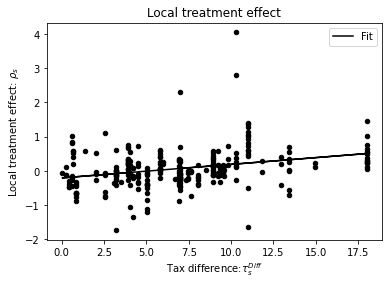

In [21]:


ax = Parametric_s.plot.scatter(x='Tax_diffs', y="coef", color='black')

Parametric_s.assign(predictions=res_sharp_s.fittedvalues).plot(x='Tax_diffs', y="predictions", ax=ax, color = 'black', label = 'Fit' )


plt.title(f"Local treatment effect");

plt.xlabel(r'Tax difference:$ \tau_s^{Diff} $ ')
plt.ylabel(r"Local treatment effect: $ \rho_s $")


plt.savefig('regplot_ps.png')
plt.show()

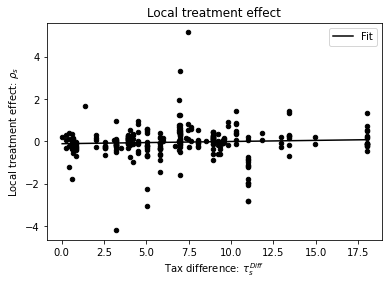

In [22]:

Parametric_l= Parametric_l.sort_values(by=['Tax_diffs'])
ax = Parametric_l.plot.scatter(x='Tax_diffs', y="coef", color='black')

Parametric_l.assign(predictions=res_sharp_l.fittedvalues).plot(x='Tax_diffs', y="predictions", ax=ax, color = 'black', label = 'Fit' )


plt.title(f"Local treatment effect");

plt.xlabel(r'Tax difference: $\tau_s^{Diff}$ ')
plt.ylabel(r"Local treatment effect: $\rho_s$ ")


plt.savefig('regplot_pl.png')
plt.show()

## Triangular


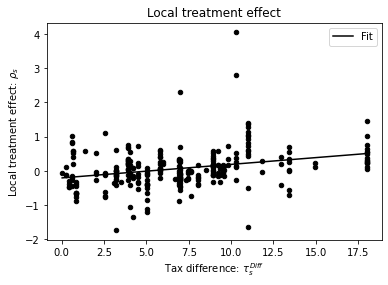

In [23]:
Tri_s=Tri_s.sort_values(by=['Tax_diffs'])

ax = Tri_s.plot.scatter(x='Tax_diffs', y="coef", color='black')

Tri_s.assign(predictions=res_Tri_s.fittedvalues).plot(x='Tax_diffs', y="predictions", ax=ax, color = 'black', label = 'Fit' )


plt.title(f"Local treatment effect");

plt.xlabel(r'Tax difference: $\tau_s^{Diff} $')
plt.ylabel(r"Local treatment effect: $ \rho_s $")


plt.savefig('regplot_ts.png')
plt.show()

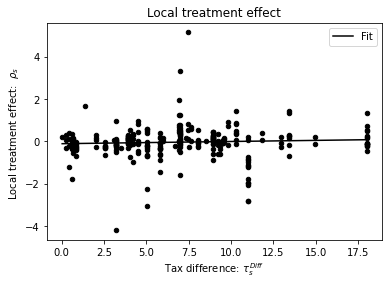

In [24]:

Tri_l=Tri_l.sort_values(by=['Tax_diffs'])

ax = Tri_l.plot.scatter(x='Tax_diffs', y="coef", color='black')

Tri_l.assign(predictions=res_Tri_l.fittedvalues).plot(x='Tax_diffs', y="predictions", ax=ax, color = 'black', label = 'Fit' )


plt.title(f"Local treatment effect");

plt.xlabel(r'Tax difference: $ \tau_s^{Diff}$ ')
plt.ylabel(r"Local treatment effect:  $ \rho_s$  ")


plt.savefig('regplot_tl.png')
plt.show()

# Examine København vs. Frederiksberg 2021

In [25]:
df_ = df[df.Neighbors_set == str(list_of_neighbors[0])]
df_ = df_[df_.Year == 2021]
df_ = df_.sort_values(by=['Distance_sign'])

k = fu.kernel(df_["Distance_sign"], c=0, h=5000)

In [26]:


model_parametric = smf.wls(short, df_, missing='drop').fit(cov_type='HC1')

model_as_html_parametric  = model_parametric.summary().tables[1].as_html()
tab = pd.read_html(model_as_html_parametric, header=0, index_col=0)[0].round(3)
tab_par_s = fu.table_col_RD(tab)
 

In [27]:

model_parametric_l = smf.wls(long, df_, missing='drop').fit(cov_type='HC1')

model_as_html_parametric_l  = model_parametric_l.summary().tables[1].as_html()
tab = pd.read_html(model_as_html_parametric_l, header=0, index_col=0)[0].round(3)
tab_par_l = fu.table_col_RD(tab).iloc[:8]


C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 20
  warnings.warn('covariance of constraints does not have full '


In [28]:
model_nonparametric = smf.wls(short, df_,weights=k).fit(cov_type='HC1')
model_as_html_nonparametric = model_nonparametric.summary().tables[1].as_html()
tab = pd.read_html(model_as_html_nonparametric, header=0, index_col=0)[0].round(3)
tab_tri_s = fu.table_col_RD(tab)

In [29]:
model_nonparametric_l = smf.wls(long, df_,weights=k).fit(cov_type='HC1')
model_as_html_nonparametric_l = model_nonparametric_l.summary().tables[1].as_html()
tab = pd.read_html(model_as_html_nonparametric_l, header=0, index_col=0)[0].round(3)
tab_tri_l = fu.table_col_RD(tab).iloc[:8]

C:\Users\45238\anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 27, but rank is 19
  warnings.warn('covariance of constraints does not have full '


In [30]:
results_RD = pd.concat([tab_par_s, tab_par_l,tab_tri_s, tab_tri_l],axis=1)
results_RD

,0,0,0,0
Intercept,$15.294^{***}$,$11.508^{***}$,$15.255^{***}$,$11.578^{***}$
,(0.014),(0.09),(0.016),(0.098)
Distance_sign,$0.0^{***}$,0.0,-0.0,-0.0
,(0.0),(0.0),(0.0),(0.0)
Border_dummy,$0.145^{***}$,-0.003,$0.181^{***}$,0.014
,(0.029),(0.027),(0.031),(0.034)
Distance_sign:Border_dummy,$0.0^{*}$,$0.0^{***}$,$0.0^{***}$,$0.0^{***}$
,(0.0),(0.0),(0.0),(0.0)


In [31]:
controls =['⁒','$\checkmark$']*2
n = [df_.shape[0]]*4
results_RD.loc[len(results_RD)] = controls
results_RD.loc[len(results_RD)] = n


In [32]:
results_RD.index = results_RD.index[:8].to_list()+ ['Controls', 'n']
print(results_RD.to_latex())

\begin{tabular}{lllll}
\toprule
{} &               0 &               0 &               0 &               0 \\
\midrule
Intercept                  &  \$15.294\textasciicircum \{***\}\$ &  \$11.508\textasciicircum \{***\}\$ &  \$15.255\textasciicircum \{***\}\$ &  \$11.578\textasciicircum \{***\}\$ \\
                           &         (0.014) &          (0.09) &         (0.016) &         (0.098) \\
Distance\_sign              &     \$0.0\textasciicircum \{***\}\$ &             0.0 &            -0.0 &            -0.0 \\
                           &           (0.0) &           (0.0) &           (0.0) &           (0.0) \\
Border\_dummy               &   \$0.145\textasciicircum \{***\}\$ &          -0.003 &   \$0.181\textasciicircum \{***\}\$ &           0.014 \\
                           &         (0.029) &         (0.027) &         (0.031) &         (0.034) \\
Distance\_sign:Border\_dummy &       \$0.0\textasciicircum \{*\}\$ &     \$0.0\textasciicircum \{***\}\$ &     \$0.0\textasciic

# Discountinuity plot


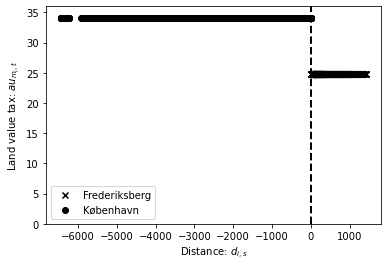

In [33]:
df_f = df_[df_.Kommune == 'Frederiksberg']
df_k = df_[df_.Kommune == 'København']

plt.scatter(df_f.Distance_sign, df_f.Grundskylds_promille, c='black', marker ='x', label = 'Frederiksberg')
plt.scatter(df_k.Distance_sign, df_k.Grundskylds_promille, c='black', label = 'København')
plt.ylim([0,36])
plt.xlabel('Distance: $d_{i,s}$')
plt.ylabel("Land value tax: $\tau_{m_i,t}$")
plt.legend(loc='lower left')
plt.axvline(x=0, color= 'black', linestyle='--', linewidth=2)

plt.savefig('discount.png')
plt.show()

In [34]:

def update(handle, orig):
    handle.update_from(orig)
    handle.set_alpha(1)

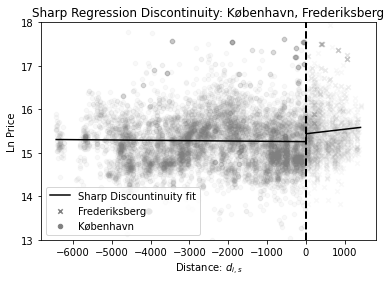

In [35]:
ax = df_f.plot.scatter(x='Distance_sign', y="log_price", color='grey', marker = 'x', label = 'Frederiksberg', alpha = 0.05)
df_k.plot.scatter(x='Distance_sign', y="log_price", color='grey', ax=ax, label = 'København', alpha = 0.05)

df_.assign(predictions=model_nonparametric.fittedvalues).plot(x='Distance_sign', y="predictions", ax=ax, color = 'black', label = 'Sharp Discountinuity fit' )

plt.axvline(x=0, color= 'black', linestyle='--', linewidth=2)
plt.title(f"Sharp Regression Discontinuity: {list_of_neighbors[0][0]}, {list_of_neighbors[0][1]}");

plt.xlabel('Distance: $d_{i,s}$')
plt.ylabel("Ln Price")

plt.legend(loc='lower left',handler_map={PathCollection : HandlerPathCollection(update_func= update),
                        plt.Line2D : HandlerLine2D(update_func = update)})

plt.axvline(x=0, color= 'black', linestyle=':', linewidth=0.1)
plt.ylim((13, 18))
plt.savefig('regplot1.png')
plt.show()


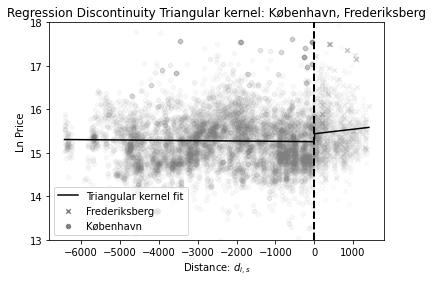

In [36]:
ax = df_f.plot.scatter(x='Distance_sign', y="log_price", color='grey', marker = 'x', label = 'Frederiksberg', alpha = 0.05)
df_k.plot.scatter(x='Distance_sign', y="log_price", color='grey', ax=ax, label = 'København', alpha = 0.05)
df_.assign(predictions=model_nonparametric.fittedvalues).plot(x="Distance_sign", y="predictions", ax=ax, color="black", label = 'Triangular kernel fit')
plt.axvline(x=0, color= 'black', linestyle='--', linewidth=2)
plt.title(f"Regression Discontinuity Triangular kernel: {list_of_neighbors[0][0]}, {list_of_neighbors[0][1]}");

plt.xlabel('Distance: $d_{i,s}$')
plt.ylabel("Ln Price")

plt.legend(loc='lower left',handler_map={PathCollection : HandlerPathCollection(update_func= update),
                        plt.Line2D : HandlerLine2D(update_func = update)})

plt.axvline(x=0, color= 'black', linestyle=':', linewidth=0.1)
plt.ylim((13, 18))
plt.savefig('regplot2.png')
plt.show()


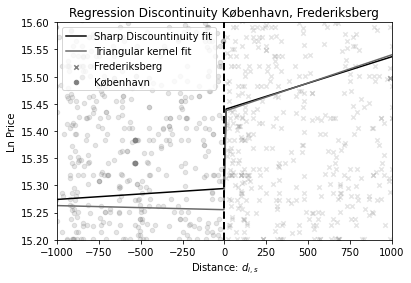

In [37]:
ax = df_f.plot.scatter(x='Distance_sign', y="log_price", color='grey', marker = 'x', label = 'Frederiksberg', alpha = 0.2)
df_k.plot.scatter(x='Distance_sign', y="log_price", color='grey', ax=ax, label = 'København', alpha = 0.2)
df_.assign(predictions=model_parametric.fittedvalues).plot(x='Distance_sign', y="predictions", ax=ax, color = 'black', label = 'Sharp Discountinuity fit' )
df_.assign(predictions=model_nonparametric.fittedvalues).plot(x="Distance_sign", y="predictions", ax=ax, color="dimgrey", label = 'Triangular kernel fit')
plt.axvline(x=0, color= 'black', linestyle='--', linewidth=2)
plt.title(f"Regression Discontinuity {list_of_neighbors[0][0]}, {list_of_neighbors[0][1]}");

plt.xlabel('Distance: $d_{i,s}$')
plt.ylabel("Ln Price")

plt.legend(loc='upper left',handler_map={PathCollection : HandlerPathCollection(update_func= update),
                        plt.Line2D : HandlerLine2D(update_func = update)})

plt.axvline(x=0, color= 'black', linestyle=':', linewidth=0.1)

plt.xlim((-1000,1000))
plt.ylim(15.2,15.6)
plt.savefig('regplot3.png')
plt.show()
